In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from openai import OpenAI

from jobsearch.params import OPENAI_API_KEY, DB_PATH
from jobsearch.utils import fetch_table_data

### Loading job descriptions

In [3]:
descriptions = fetch_table_data(DB_PATH).description

# keep non null descriptions
descriptions = descriptions[~descriptions.isna()]

(0.0, 10000.0)

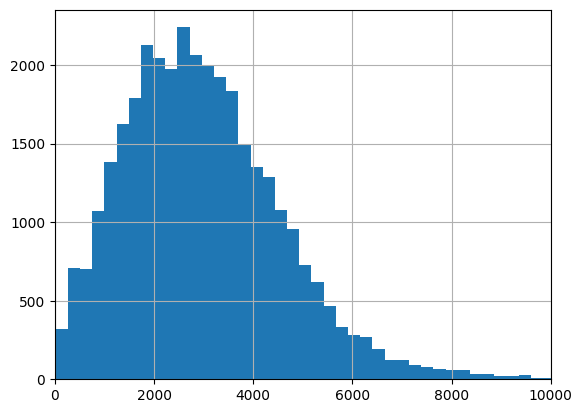

In [40]:
descriptions_len = descriptions.str.len()
descriptions_len.hist(bins=200)
plt.xlim([0,10000])


In [54]:
lower_bound=descriptions_len.describe().iloc[4]
upper_bound=descriptions_len.describe().iloc[6]

descriptions = descriptions[(descriptions.str.len() >= lower_bound) & (descriptions.str.len() >= upper_bound)]

In [62]:
pd.options.display.max_colwidth

description_sample = descriptions.sample(5, random_state=42)
description_sample.iloc[0]

"Company:\nQualcomm France S.A.R.L.\n\nJob Area:\nEngineering Group, Engineering Group > Software Engineering\n\nGeneral Summary:\n\nAt Qualcomm XR labs Europe, we’re a passionate team of engineers who want to change the world through virtual and augmented reality products and technologies. We develop state-of-the-art computer vision, deep learning, and graphics solutions to deliver ultra-optimized, power-efficient software and hardware to enable the intelligent perception of the world around us. The Qualcomm XR Labs Europe is rapidly expanding and seeking innovators who will create the new digital world. We’re hiring at any of the XR Labs Europe locations in Austria, France, Netherlands, and Spain.\n\nQualcomm is redefining the connected, intelligent edge with exciting new products for Augmented Reality (AR) and Virtual Reality (VR). We are a world-class engineering organization developing state-of-the-art computer vision, deep learning, and graphics solutions to deliver ultra-optimiz

### Define few-shots prompt : instructions + examples

In [27]:
instructions = """Tu dois extraire les informations clés d'une offre d'emploi au format JSON :

    1. Salaire et compléments:
    - Pour un salaire indiqué comme minimum (ex. 'à partir de'), utilise-le pour le champ 'montant_min'.
    - Pour un salaire indiqué comme maximum (ex. 'jusqu'à'), saisis-le dans 'montant_max'.
    - En cas de montant unique sans autres indications, remplis à la fois 'montant_min' et 'montant_max' avec cette valeur.
    - Dans le cas où l'offre mentionne explicitement des éléments additionnels au salaire de base, comme des primes ou des avantages, liste ces éléments dans le champ 'avantages_complementaires'.

    2. Stack Technologique:
    - Si l'offre d'emploi spécifie certaines technologies, outils ou langages de programmation (ex. 'Recherche développeur Java, expérience en SQL souhaitée'), liste ces technologies dans le champ 'stack_technologique'.

    3. Niveau d'Étude:
    - Note le niveau d'étude requis pour le poste dans le champ 'niveau_etude'. Par exemple, si l'offre mentionne 'Bac+5 requis', indique cela dans le champ correspondant.
K
    4. Langues Parlées:
    - Liste les langues exigées pour le poste sous 'langues_parlees'. Par exemple, si l'offre indique 'Anglais courant nécessaire', ajoute 'Anglais' à la liste des langues parlées.

    5. Informations Manquantes:
    - En cas d'absence d'information, utilise 'null' pour les champs numériques comme 'montant_min' et 'montant_max', et une liste vide pour les champs de type liste comme 'avantages_complementaires' et 'langues_parlees'.

"""

In [28]:
examples = """



"""

In [29]:
prompt = instructions + examples

### Request openai API

In [26]:
client = OpenAI()

# models
GPT35 = "gpt-3.5-turbo-1106"
GPT4 = "gpt-4-0613"
GPT4_32K = "gpt-4-32k-0613"

response = client.chat.completions.create(
  model=GPT35,
  response_format={ "type": "json_object" },
  messages=[
    {"role": "system", "content": prompt},
    {"role": "user", "content": description}
  ]
)

print(response.choices[0].message.content)

NameError: name 'description' is not defined